In [1]:
from dolfin import *
from fenics import *
import numpy as np
import mshr
import matplotlib
import matplotlib.pyplot as plt

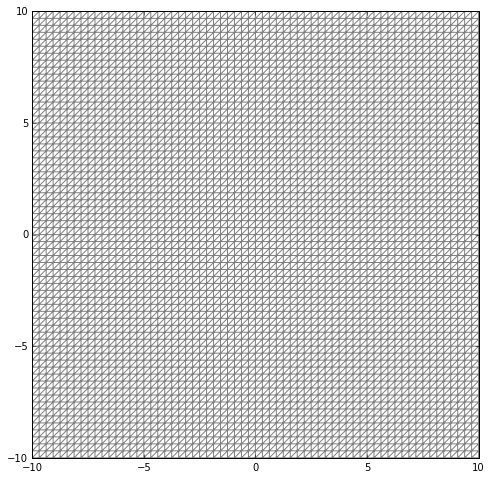

In [2]:
n=64
#geometry=mshr.Circle(Point(0.0,0.0),1.0)
#mesh = mshr.generate_mesh(geometry,n)
mesh = RectangleMesh(Point(-10, -10), Point(10, 10), n, n)
plt.figure(figsize=(8,8))
plot(mesh)



In [3]:
T = 500.0            # final time
num_steps = 1000    # number of time steps
dt = T / num_steps # time step size

# Define function space for system of concentrations
P1 = FiniteElement('P', 'triangle', 1)
element = MixedElement([P1, P1])
V = FunctionSpace(mesh, element)

# Define test functions
v_1, v_2 = TestFunctions(V)

# Define functions for velocity and concentrations
u = Function(V)
u_n = Function(V)

u_0 = Expression(('0.5', '0.25'), degree=3)
u_n = project(u_0, V)

# Add random noise
N = u_n.vector().size()
u_n.vector()[:] = np.random.random(N)

# Split system functions to access components
u_1, u_2 = split(u)
u_n1, u_n2 = split(u_n)


# Define source terms
K = Constant(0.06)
k = Constant(dt)
Du = Constant(2e-5)
Dv = Constant(1e-5)
f = Constant(0.065)

# Define variational problem
F = ((u_1 - u_n1) / k)*v_1*dx + Du*dot(grad(u_1), grad(v_1))*dx + u_1*u_2*u_2*v_1*dx - f*(1-u_1)*v_1*dx \
+ ((u_2 - u_n2) / k)*v_2*dx + Dv*dot(grad(u_2), grad(v_2))*dx - u_1*u_2*u_2*v_2*dx + (f + K)*u_2*v_2*dx

# Create VTK files for visualization output
vtkfile_u_1 = File('reaction_system/u_1.pvd')
vtkfile_u_2 = File('reaction_system/u_2.pvd')

# Create progress bar
progress = Progress('Time-stepping')
set_log_level(PROGRESS)

# Time-stepping
t = 0
for n in range(num_steps):
    # Update current time
    t += dt

    # Solve variational problem for time step
    solve(F == 0, u)

    # Save solution to file (VTK)
    _u_1, _u_2 = u.split()
    vtkfile_u_1 << _u_1
    vtkfile_u_2 << _u_2

    # Update previous solution
    u_n.assign(u)

    # Update progress bar
    progress.update(t / T)

In [4]:
# Jupyter doesn't let me download a folder, so I must create a .rar to download the output
# The output needs to be asambled with ParaView

!tar chvfz notebook.tar.gz *

Mesh from image.ipynb
Untitled.ipynb
reaction_system/
reaction_system/u_2000871.vtu
reaction_system/u_2000196.vtu
reaction_system/u_1000380.vtu
reaction_system/u_2000344.vtu
reaction_system/u_1000290.vtu
reaction_system/u_1000502.vtu
reaction_system/u_2000000.vtu
reaction_system/u_2000048.vtu
reaction_system/u_1000567.vtu
reaction_system/u_1000675.vtu
reaction_system/u_1000114.vtu
reaction_system/u_1000880.vtu
reaction_system/u_2000475.vtu
reaction_system/u_1000835.vtu
reaction_system/u_1000264.vtu
reaction_system/u_2000455.vtu
reaction_system/u_1000328.vtu
reaction_system/u_2000586.vtu
reaction_system/u_1000485.vtu
reaction_system/u_1000523.vtu
reaction_system/u_1000615.vtu
reaction_system/u_1000170.vtu
reaction_system/u_1000601.vtu
reaction_system/u_1000893.vtu
reaction_system/u_1000854.vtu
reaction_system/u_2000038.vtu
reaction_system/u_2000539.vtu
reaction_system/u_1000080.vtu
reaction_system/u_2000481.vtu
reaction_system/u_2000377.vtu
reaction_system/u_1000257.vtu
reaction_system/

reaction_system/u_2000381.vtu
reaction_system/u_2000425.vtu
reaction_system/u_2000480.vtu
reaction_system/u_2000095.vtu
reaction_system/u_1000229.vtu
reaction_system/u_1000166.vtu
reaction_system/u_2000662.vtu
reaction_system/u_2000315.vtu
reaction_system/u_2000645.vtu
reaction_system/u_1000163.vtu
reaction_system/u_2000495.vtu
reaction_system/u_2000717.vtu
reaction_system/u_1000044.vtu
reaction_system/u_2000952.vtu
reaction_system/u_1000315.vtu
reaction_system/u_1000828.vtu
reaction_system/u_1000106.vtu
reaction_system/u_2000090.vtu
reaction_system/u_1000720.vtu
reaction_system/u_1000210.vtu
reaction_system/u_2000444.vtu
reaction_system/u_1000174.vtu
reaction_system/u_2000650.vtu
reaction_system/u_1000634.vtu
reaction_system/u_2000810.vtu
reaction_system/u_2000768.vtu
reaction_system/u_1000091.vtu
reaction_system/u_2000041.vtu
reaction_system/u_2000635.vtu
reaction_system/u_1000284.vtu
reaction_system/u_2000472.vtu
reaction_system/u_1000561.vtu
reaction_system/u_2000502.vtu
reaction_s

reaction_system/u_1000646.vtu
reaction_system/u_2000882.vtu
reaction_system/u_2000696.vtu
reaction_system/u_2000085.vtu
reaction_system/u_1000375.vtu
reaction_system/u_1000233.vtu
reaction_system/u_2000578.vtu
reaction_system/u_2000162.vtu
reaction_system/u_1000637.vtu
reaction_system/u_2000157.vtu
reaction_system/u_1000417.vtu
reaction_system/u_1000593.vtu
reaction_system/u_1000291.vtu
reaction_system/u_2000695.vtu
reaction_system/u_2000961.vtu
reaction_system/u_1000405.vtu
reaction_system/u_2000076.vtu
reaction_system/u_1000432.vtu
reaction_system/u_2000005.vtu
reaction_system/u_2000508.vtu
reaction_system/u_1000644.vtu
reaction_system/u_1000698.vtu
reaction_system/u_2000195.vtu
reaction_system/u_1000757.vtu
reaction_system/u_2000284.vtu
reaction_system/u_1000446.vtu
reaction_system/u_2000651.vtu
reaction_system/u_2000834.vtu
reaction_system/u_2000956.vtu
reaction_system/u_1000396.vtu
reaction_system/u_2000525.vtu
reaction_system/u_1000103.vtu
reaction_system/u_2000805.vtu
reaction_s

reaction_system/u_1000235.vtu
reaction_system/u_1000190.vtu
reaction_system/u_2000273.vtu
reaction_system/u_1000374.vtu
reaction_system/u_2000579.vtu
reaction_system/u_2000530.vtu
reaction_system/u_2000756.vtu
reaction_system/u_2000457.vtu
reaction_system/u_2000938.vtu
reaction_system/u_1000683.vtu
reaction_system/u_2000415.vtu
reaction_system/u_1000397.vtu
reaction_system/u_1000302.vtu
reaction_system/u_2000947.vtu
reaction_system/u_2000592.vtu
reaction_system/u_1000481.vtu
reaction_system/u_1000082.vtu
reaction_system/u_1000838.vtu
reaction_system/u_1000598.vtu
reaction_system/u_1000695.vtu
reaction_system/u_1000765.vtu
reaction_system/u_2000532.vtu
reaction_system/u_2000563.vtu
reaction_system/u_2000173.vtu
reaction_system/u_1000199.vtu
reaction_system/u_2000310.vtu
reaction_system/u_1000733.vtu
reaction_system/u_1000178.vtu
reaction_system/u_2000383.vtu
reaction_system/u_1000901.vtu
reaction_system/u_1000353.vtu
reaction_system/u_2000916.vtu
reaction_system/u_1000773.vtu
reaction_s

reaction_system/u_1000980.vtu
reaction_system/u_1000960.vtu
reaction_system/u_2000332.vtu
reaction_system/u_2000504.vtu
reaction_system/u_2000653.vtu
reaction_system/u_2000971.vtu
reaction_system/u_1000920.vtu
reaction_system/u_2000765.vtu
reaction_system/u_2000509.vtu
reaction_system/u_1000073.vtu
reaction_system/u_2000301.vtu
reaction_system/u_2000466.vtu
reaction_system/u_1000338.vtu
reaction_system/u_1000846.vtu
reaction_system/u_1000802.vtu
reaction_system/u_1000283.vtu
reaction_system/u_2000779.vtu
reaction_system/u_1000826.vtu
reaction_system/u_2000611.vtu
reaction_system/u_2000104.vtu
reaction_system/u_2000744.vtu
reaction_system/u_2000055.vtu
reaction_system/u_2000422.vtu
reaction_system/u_2000943.vtu
reaction_system/u_2000331.vtu
reaction_system/u_1000311.vtu
reaction_system/u_2000819.vtu
reaction_system/u_1000654.vtu
reaction_system/u_2000417.vtu
reaction_system/u_1000810.vtu
reaction_system/u_1000974.vtu
reaction_system/u_2000183.vtu
reaction_system/u_1000666.vtu
reaction_s

reaction_system/u_2000826.vtu
reaction_system/u_2000423.vtu
reaction_system/u_2000838.vtu
reaction_system/u_2000678.vtu
reaction_system/u_2000600.vtu
reaction_system/u_2000158.vtu
reaction_system/u_2000718.vtu
reaction_system/u_1000450.vtu
reaction_system/u_2000552.vtu
reaction_system/u_1000635.vtu
reaction_system/u_2000330.vtu
reaction_system/u_1000979.vtu
reaction_system/u_2000347.vtu
reaction_system/u_2000848.vtu
reaction_system/u_1000013.vtu
reaction_system/u_1000171.vtu
reaction_system/u_2000623.vtu
reaction_system/u_2000177.vtu
reaction_system/u_1000749.vtu
reaction_system/u_2000937.vtu
reaction_system/u_1000811.vtu
reaction_system/u_1000853.vtu
reaction_system/u_2000762.vtu
reaction_system/u_1000081.vtu
reaction_system/u_2000655.vtu
reaction_system/u_2000521.vtu
reaction_system/u_2000077.vtu
reaction_system/u_1000595.vtu
reaction_system/u_2000026.vtu
reaction_system/u_2000558.vtu
reaction_system/u_2000590.vtu
reaction_system/u_1000857.vtu
reaction_system/u_1000680.vtu
reaction_s

reaction_system/u_2000827.vtu
reaction_system/u_1000580.vtu
reaction_system/u_1000225.vtu
reaction_system/u_1000207.vtu
reaction_system/u_2000701.vtu
reaction_system/u_2000446.vtu
reaction_system/u_2000560.vtu
reaction_system/u_2000164.vtu
reaction_system/u_1000063.vtu
reaction_system/u_1000030.vtu
reaction_system/u_2000012.vtu
reaction_system/u_1000122.vtu
reaction_system/u_2000700.vtu
reaction_system/u_1000984.vtu
reaction_system/u_1000649.vtu
reaction_system/u_1000560.vtu
reaction_system/u_2000929.vtu
reaction_system/u_1000076.vtu
reaction_system/u_1000716.vtu
reaction_system/u_1000622.vtu
reaction_system/u_1000713.vtu
reaction_system/u_1000794.vtu
reaction_system/u_2000238.vtu
reaction_system/u_2000092.vtu
reaction_system/u_1000089.vtu
reaction_system/u_1000343.vtu
reaction_system/u_2000543.vtu
reaction_system/u_2000459.vtu
reaction_system/u_2000096.vtu
reaction_system/u_1000555.vtu
reaction_system/u_1000689.vtu
reaction_system/u_2000428.vtu
reaction_system/u_2000136.vtu
reaction_s

reaction_system/u_2000293.vtu
reaction_system/u_2000473.vtu
reaction_system/u_2000609.vtu
reaction_system/u_2000218.vtu
reaction_system/u_2000986.vtu
reaction_system/u_2000685.vtu
reaction_system/u_1000997.vtu
reaction_system/u_1000906.vtu
reaction_system/u_2000603.vtu
reaction_system/u_2000484.vtu
reaction_system/u_1000793.vtu
reaction_system/u_2000964.vtu
reaction_system/u_1000070.vtu
reaction_system/u_2000637.vtu
reaction_system/u_1000056.vtu
reaction_system/u_1000279.vtu
reaction_system/u_1000184.vtu
reaction_system/u_2000336.vtu
reaction_system/u_2000772.vtu
reaction_system/u_1000831.vtu
reaction_system/u_2000106.vtu
reaction_system/u_2000420.vtu
reaction_system/u_2000891.vtu
reaction_system/u_1000843.vtu
reaction_system/u_2000577.vtu
reaction_system/u_1000967.vtu
reaction_system/u_1000198.vtu
reaction_system/u_2000081.vtu
reaction_system/u_2000935.vtu
reaction_system/u_1000101.vtu
reaction_system/u_1000614.vtu
reaction_system/u_2000694.vtu
reaction_system/u_2000384.vtu
reaction_s